In [1]:
import numpy as np
import matplotlib.pyplot as plt
from my_timer import timer_decorator
from scipy.optimize import minimize

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# definice funkcionálů z původního kódu

In [2]:
# energy functional
def energy(v_internal, x, v, p):
    u_a = v[0]                # v at the left end
    u_b = v[-1]               # v at the right end
    h = x[1] - x[0]             # mesh size

    v = np.concatenate(([u_a], v_internal, [u_b]))
    vx = np.zeros(ne)
    x_mid = np.zeros(ne)
    v_mid = np.zeros(ne)
    Jv_density = np.zeros(ne)
    for i in range(0, ne):
        vx[i] = (v[i + 1] - v[i]) / h
        x_mid[i] = (x[i + 1] + x[i]) / 2
        v_mid[i] = (v[i + 1] + v[i]) / 2
        Jv_density[i] = (1 / p) * np.power(abs(vx[i]), p) - f(x_mid[i]) * v_mid[i]

    return h * np.sum(Jv_density)


# exact minimizer for p=2
def u_init(x):
    return 0 * (x + 1) * (x - 1)


# rhs
def f(x):
    return -10 * np.ones(x.size)

In [3]:
p, a, b = 3, -1, 1
ne = 100
x = np.linspace(a, b, ne + 1)

v = u_init(x)            # testing function
v_internal = v[1:-1]

print("energy (init)=", energy(v_internal, x, v, p))

energy (init)= 0.0


# minimalizace pomocí scipy.optimize.minimize
timer_decorator je dekorátor:
- měří čas běhu funkce a po dokončení vypíše čas
- dá se použít na funkci pomocí `@timer_decorator`
- nebo se dá existující funkce obalit pomocí `f = timer_decorator(f)`

In [4]:
minimize_timed = timer_decorator(minimize)

solopt = minimize_timed(energy, v_internal, args=(x, v, p))
u_internal = solopt.x

print("energy (scipy optim)=", energy(u_internal, x, v, p,))

minimize#0: 15.320 s
energy (scipy optim)= -16.86446605262881


# řešení s nějakou mojí mizernou implementací quasi-newtona s diferencema a bfgs

In [5]:
from my_solvers import trust_region_quasi

fun = lambda v_internal: energy(v_internal, x, v, p)

solopt, iter = trust_region_quasi(fun, x0=v_internal, c0=1, tolf=1e-6, tolg=1e-3, maxit=1000, h_diff=1e-6)

print("energy (my optim)=", energy(solopt, x, v, p))

Stopping condition for f is satisfied
it=512, f=-16.864464409854786, c=2.0, rho=0.4501108153483022, ||g||=0.007151657537256086
trust_region_quasi#0: 64.592 s
energy (my optim)= -16.864464409854786


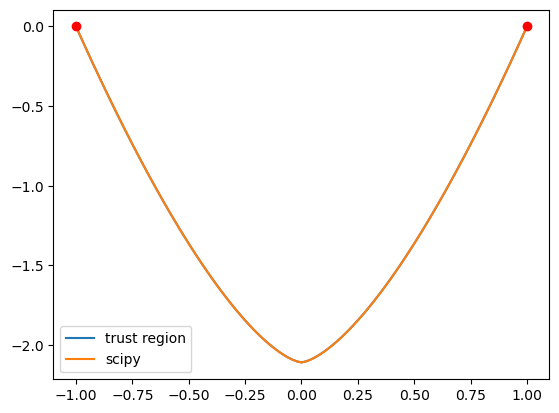

In [6]:
u_a = v[0]                # v at the left end
u_b = v[-1]               # v at the right end
u = np.concatenate(([u_a], u_internal, [u_b]))
u_trust_region = np.concatenate(([u_a], solopt, [u_b]))

plt.plot(x, u_trust_region, label="trust region")
plt.plot(x, u, label="scipy")
plt.plot(x[[0, -1]], v[[0, -1]], 'ro')
plt.legend()
plt.show()


# jemnější síť

In [7]:
p, a, b = 3, -1, 1
ne = 100
x = np.linspace(a, b, ne + 1)

v = u_init(x)            # testing function
v_internal = v[1:-1]

print("energy (init)=", energy(v_internal, x, v, p))

energy (init)= 0.0


In [8]:
minimize_timed = timer_decorator(minimize)

solopt = minimize_timed(energy, v_internal, args=(x, v, p))
u_internal = solopt.x

print("energy (scipy optim)=", energy(u_internal, x, v, p,))

minimize#0: 15.395 s
energy (scipy optim)= -16.86446605262881


In [9]:

fun = lambda v_internal: energy(v_internal, x, v, p)

solopt, iter = trust_region_quasi(fun, x0=v_internal, c0=1, tolf=1e-6, tolg=1e-3, maxit=1000, h_diff=1e-6)

print("energy (my optim)=", energy(solopt, x, v, p))

Stopping condition for f is satisfied
it=512, f=-16.864464409854786, c=2.0, rho=0.4501108153483022, ||g||=0.007151657537256086
trust_region_quasi#1: 64.369 s
energy (my optim)= -16.864464409854786


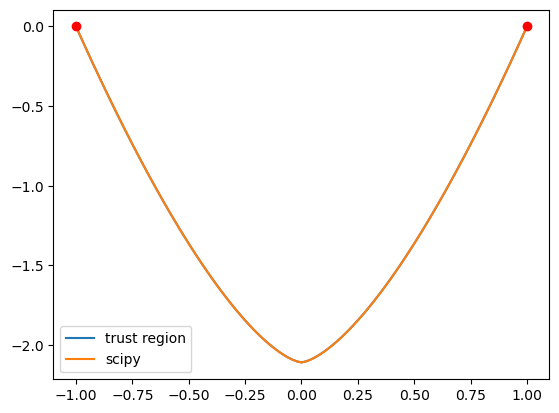

In [10]:
u_a = v[0]                # v at the left end
u_b = v[-1]               # v at the right end
u = np.concatenate(([u_a], u_internal, [u_b]))
u_trust_region = np.concatenate(([u_a], solopt, [u_b]))

plt.plot(x, u_trust_region, label="trust region")
plt.plot(x, u, label="scipy")
plt.plot(x[[0, -1]], v[[0, -1]], 'ro')
plt.legend()
plt.show()
